# Restaurant Tips: Which variables — payer’s gender, smoking status, day of the week, time of day, and party size — are associated with the tip percentage?

Group name: 2 / Student names: Rafa Africa, Ben Ni, Yingming Sha, Michael Tham

Course: STAT 301 Section 201 / Date: 04/06/2025 

## (1) Introduction

Tipping is a widespread social norm in service industries, particularly in restaurants, where it can contribute significantly to employee income. However, tipping behavior is not entirely uniform—numerous studies have found that factors such as customer demographics, situational context, and group dynamics can all influence how much people tip (Jewell, 2008). Understanding what drives tipping behavior is valuable not only for economic modeling, but also for helping restaurant managers and servers improve their service strategies and expectations.

This study explores whether variables such as payer’s gender, smoking status, day of the week, time of day, and party size are associated with the tip percentage left in a restaurant setting. Research has shown that, for instance, tipping tends to decrease as party size increases, likely due to a diffusion of responsibility or shared norms within larger groups (Haugom & Thrane, 2022). Similarly, differences in tipping patterns have been observed based on temporal variables like weekday vs. weekend or lunch vs. dinner (Jewell, 2008).

Building upon these insights, this study aims to investigate the relationships between specific variables—payer’s gender, smoking status, day of the week, time of day, and dining party size—and tip percentage in a restaurant setting.

This study contributes to the existing body of knowledge on tipping behavior by focusing on specific variables that have been identified in prior research as potential influencers of tipping practices. By examining these factors collectively, the study aims to provide a comprehensive understanding of their individual and combined effects on tip percentages.

### Research Question
**Our Research Question**: Which variables, payer's gender, smoking status, day of the week, time of day, and dining party size, are associated with the tip percentage in a restaurant?

**Response variable** - tip percentage (total bill divided by the tip amount left by customer);

**Explanatory variables** - sex (gender), day (day of the week), time (Lunch or Dinner), and party size.

**Explanation**: This question is focused on **inference**, as it aims to understand the relationships between the sex, smoker, day, time, party size and the tip percentage. The goal is to identify which factors are significant in determining the tip percentage, rather than predicting individual tip percentage for future transactions.

## (2) Methods and Results

In [1]:
# First we load the library
library(tidyverse)
library(gridExtra) # for visualization
library(MASS) # for selection
library(car) # for vif
library(httr) # load data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




### a) Data 

#### Data Description 

The "Restaurant Tips Dataset" details tipping behavior in a restaurant setting. The dataset was collected over an long period of time and includes a variety of factors that may influence the amount a customer tips. Each entry represents a unique transaction, recording details such as the bill amount, tip given, gender of the payer, smoking preference, day of the week, time of day, and number of diners. This data contains 244 observations and 7 variables. The continuous variables are total_bill, tip, and size, while the categorical variables are sex, smoker, day, and time. 

The dataset used in this study was collected through observational means, meaning the data reflects real-world restaurant transactions without any experimental manipulation. As such, while we can investigate associations between variables and tip percentage, causal conclusions cannot be drawn.

**Description of each variable:**

| id | Key       | Description|
|----|-----------|-----------------------------------------------------------|
|1   |total_bill | Total bill amount in dollars                               |
|2   |tip        | Tip amount in dollars                                      |
|3   |sex        | Gender of the person paying the bill (Male/Female)         |
|4   |smoker     | Whether the person is a smoker (Yes/No)                    |
|5   |day        | Day of the transaction (Thur/Fri/Sat/Sun)                  |
|6   |time       | Time of day when the transaction took place (Lunch/Dinner) |
|7   |size       | Size of the dining party (number of people)                |

**Source and information**

According to the owner of this dataset, Saurabh Badole, the data in this dataset was collected from a popular restaurant over a specified period (Badole, 2024). I retreived this dataset through Badole publishing it on Kaggle.

**Justification**: For this research question, total_bill and tip will be dropped since the tip percentage is calculated based on these two covariates. If we include these two covariates, there will be a multicollinearity issue.

In [2]:
# Read the data into R
invisible(
GET(
  url = "https://www.kaggle.com/api/v1/datasets/download/saurabhbadole/restaurant-tips-dataset",
  authenticate("yingmingsha", "c52dacb47dd5f58ebfe40f4eb435b1b4", type = "basic"),
  write_disk("restaurant-tips-dataset.zip", overwrite = TRUE)
    )
)

unzip("restaurant-tips-dataset.zip")

tips <- read.csv("tips.csv")

head(tips)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


### b) Exploratory Data Analysis (EDA)
- Include 2 effective and creative visualizations : explore the association of some potential explanatory variables with the response (use colours, point types, point size and/or faceting to include more variables) and highlight potential problems (e.g., multicollinearity or outliers)
- Transform some variables if needed and include a clear explanation (e.g. log-transformation may be useful when outliers are present)
- Any summary tables that are relevant to your analysis (e.g., summarize number of observation in groups, indicate if NAs exist)
- Be sure not to print output that takes up a lot of screen space!


In [3]:
# Main developer: Yingming 

# Check missing values and duplicated rows
summary_table <- tibble(
  Metric = c("Total Missing Values", "Total Duplicate Rows"),
  Count = c(sum(is.na(tips)), sum(duplicated(tips))) 
)
summary_table

Metric,Count
<chr>,<int>
Total Missing Values,0
Total Duplicate Rows,1


In [4]:
# Main developer: Yingming 

# Clean and wrangle the data into a tidy format
tip_clean <- tips %>%
    distinct() %>% # remove duplicated row
    mutate(tip_per = tip / total_bill * 100) # calculate the bill percentage 

tip_final <- tip_clean %>%
    dplyr::select(-total_bill, -tip) # drop 'total_bill' and 'tip' columns (justification given above)

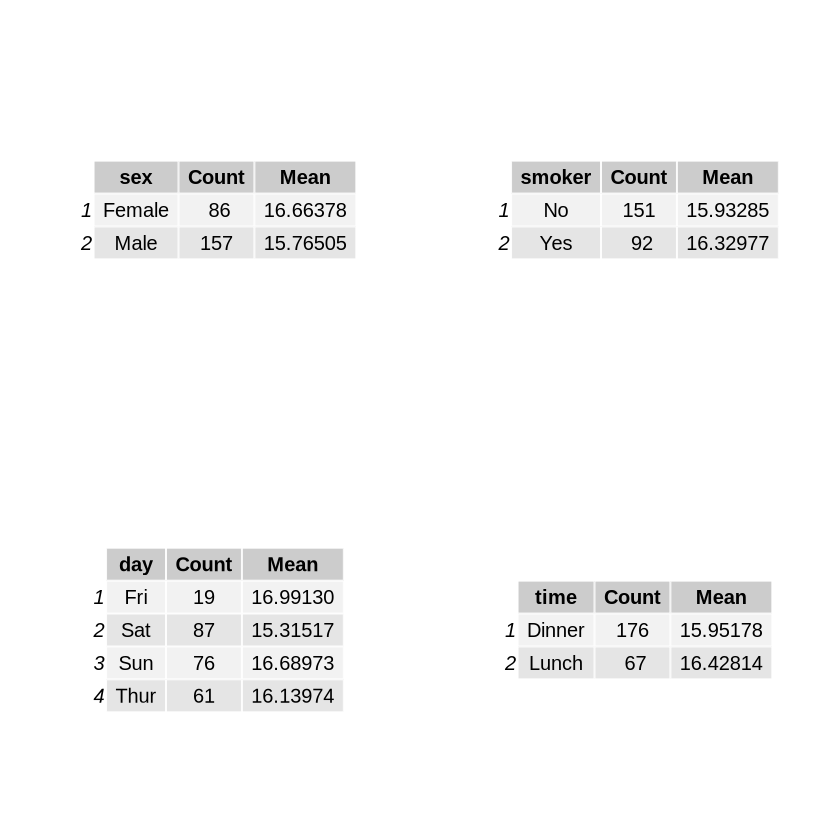

In [5]:
# Main developer: Yingming

# Summary tables that are relevant to the analysis
summary_table_sex <- tip_final %>%
  group_by(sex) %>%
  summarize(
      Count = n(),                         # Total count
      Mean = mean(tip_per, na.rm = TRUE)   # Mean
  )

summary_table_smo <- tip_final %>%
  group_by(smoker) %>%
  summarize(
    Count = n(),                                  
    Mean = mean(tip_per, na.rm = TRUE) 
  )

summary_table_day <- tip_final %>%
  group_by(day) %>%
  summarize(
    Count = n(),                               
    Mean = mean(tip_per, na.rm = TRUE)
  )

summary_table_time <- tip_final %>%
  group_by(time) %>%
  summarize(
    Count = n(),                                
    Mean = mean(tip_per, na.rm = TRUE)
  )

summary_table_size <- tip_final %>%
  group_by(size) %>%
  summarize(
      Count = n(),      
      Mean = mean(tip_per, na.rm = TRUE)   
  )

grid.arrange(
  tableGrob(summary_table_sex), tableGrob(summary_table_smo),
  tableGrob(summary_table_day), tableGrob(summary_table_time),
  ncol = 2
)

**Interpretation of Summary Tables:**

Since the dataset contains more categorical variables, the summary tables provide a basic overview of each covariate in relation to our response variable. From the tables, we can see that there is not much difference in the average tip percentage across sex, smoker status, day, and time. However, for party size, there appears to be a potential decrease in the average tip percentage as the party size increases.

In [6]:
# need 2 visualizations (my previous visualization is about total_bill, does anyone have other visualization?) (!)

**The reasons why visualizations are relevant**: 

(!)

### c) Methods: Plan
- Describe in written English the methods you used to perform your analysis from beginning to end.
- Provide a detailed justification of the method(s) used. The analysis must be based primarily on methods learned in the class (other method can be used for comparison).
- Make sure that the analysis responded the question posed and that the proposed method is appropriate for the characteristics of the data.
- If variable selection methods are used, justify the method used and explain what data will be used.
- If various models will be compared explain how you will select a final one.
- Make sure to interpret/explain the results you obtain. It’s not enough to just say, “I fitted a linear model with these covariates, and my R-square is 0.87”: If inference is the aim of your project, a detailed interpretation of your fitted model is required, as well as a discussion of relevant quantities. For example, which coefficient(s) is(are) statistically significant? interpretation of significant coefficients, how does the model fit the data? among other points; If prediction is the project's aim, describe the test data used or how it was created; In both cases, a careful model assessment must be conducted.
- Include no more than 3 visualizations and/or tables to support your points. Ensure your tables and/or figures are labelled with a figure/table number and readable fonts.

Code: all the analysis, from reading the data to visualizing results, must be based on clean, reproducible and well-commented code

**Proposed Method:** Multiple Linear Regression

**Why is this method appropriate?**

This method is suitable because it allows us to model the relationship between a continuous response variable (tip percentage) and multiple predictor variables. The coefficients of the regression model will give us clear insights into how each predictor influences the tip percentage and easy to interpret.

**Which assumptions are required, if any, to apply the method selected?**
1. Linearity: The relationship between the predictors and the response variable is assumed to be linear. 
2. Independence: Observations are assumed to be independent of each other, meaning that the tip percentage of one transaction doesn’t affect others.
3. Homoscedasticity: The variance of the residuals (errors) is assumed to be constant across all levels of the predictors.
4. Normality of Residuals: The residuals are assumed to follow a normal distribution.

**What are the potential limitations or weaknesses of the method selected?**
1. Linearity Assumption: If the relationship between the predictors and the tip percentage is non-linear, the model may not perform well. 
2. Multicollinearity: If any of the predictors are highly correlated with each other (e.g., **day** and **time**), it could lead to multicollinearity, where it becomes difficult to isolate the effect of individual predictors. However, this can be checked using vif().

**Variable Selection Method:** Stepwise Selection

We will be using stepwise selection to refine our model and identify the most significant predictors of tip percentage. Stepwise selection is useful when there is some uncertainty about which predictors are most relevant, as it allows for both adding and removing variables based on statistical criteria. 

We will apply stepwise selection using AIC, which balances model fit and complexity. The response variable is tip percentage, and the predictors initially considered were sex, smoker status, day, time, and size.

#### Computational Code and Output

In [7]:
# Main developer: Yingming 

# Null model with no covariates
tip_null <- lm(tip_per ~ 1, data = tip_final)
# Full model with all the covariates
tip_full <- lm(tip_per ~ ., data = tip_final)

# Multicollinearity Issue Check
vif(tip_full) # i am not sure if we need to check this, what do you guys think? (!)

summary(tip_full)

,GVIF,Df,GVIF^(1/(2*Df))
sex,1.057406,1,1.028303
smoker,1.133435,1,1.064629
day,10.460180,3,1.478847
time,8.997935,1,2.999656
size,1.061287,1,1.030188



Call:
lm(formula = tip_per ~ ., data = tip_final)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.172  -3.156  -0.401   2.872  53.445 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.3120     2.0791   8.808 2.86e-16 ***
sexMale      -0.8724     0.8383  -1.041   0.2991    
smokerYes     0.3911     0.8557   0.457   0.6481    
daySat       -0.1646     1.8381  -0.090   0.9287    
daySun        1.6886     1.9071   0.885   0.3768    
dayThur      -1.7726     2.3282  -0.761   0.4472    
timeLunch     2.3383     2.6168   0.894   0.3725    
size         -0.9651     0.4226  -2.284   0.0233 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.077 on 235 degrees of freedom
Multiple R-squared:  0.04239,	Adjusted R-squared:  0.01387 
F-statistic: 1.486 on 7 and 235 DF,  p-value: 0.1729


**Interpretation of the Full Model:**  
The model predicts tip percentage using all covariates, including sex, smoker, day, time, and size. 

The coefficient for `sexMale` is **-0.87** (p = 0.299), indicating that, on average, men tend to tip **0.87% less** than women. However, this effect is **not statistically significant** due to the p-value is large than 0.05, suggesting that sex does not have a strong influence on tip percentage in this dataset.

The coefficient for `smokerYes` is **0.39** (p = 0.648), meaning that smokers tip **0.39% more** than non-smokers. Again, this result is **not statistically significant** due to the p-value is large than 0.05, meaning that there is no strong evidence that smoker status affects tipping behavior.

The reference category for `day` is Friday.
- Compared to Friday:
  - Saturday: **-0.16** (p = 0.929) → meaning that Saturday customers tip **0.16% less** than Friday
  - Sunday: **1.69** (p = 0.377) → meaning that Sunday customers tip **1.69% more** than Friday
  - Thursday: **-1.77** (p = 0.447) → meaning that Thursday customers tip **1.77% less** than Friday
- However, none of these coefficients are significant, **tip percentages do not vary significantly by day of the week**.

The coefficient for `timeLunch` is **2.34** (p = 0.373), suggesting that lunch-time customers tip **2.34% more** than dinner customers. However, this result is **not statistically significant** due to the p-value is large than 0.05, so there is no strong evidence that time of day affects tipping behavior.

The coefficient for `size` is **-0.97** (p = 0.023), meaning that for each additional person in the party, the **tip percentage decreases by 0.97%**. This effect **is statistically significant** due to the p-value is smaller than 0.05, suggesting a real trend where larger groups tend to tip a lower percentage of their bill.

Therefore, from the full model summary, only significant predictor in the model is **size**, indicating that as the number of diners increases, the tip percentage decreases. 

In [8]:
# Main developer: Yingming 

# Use stepwise selection to find the reduced model ("backward" direction)
tip_backward <- stepAIC(tip_full, direction = "backward", k = 2)

Start:  AIC=884.86
tip_per ~ sex + smoker + day + time + size

         Df Sum of Sq    RSS    AIC
- smoker  1     7.713 8686.5 883.08
- day     3   164.195 8843.0 883.42
- time    1    29.488 8708.2 883.69
- sex     1    39.992 8718.8 883.98
<none>                8678.8 884.86
- size    1   192.620 8871.4 888.20

Step:  AIC=883.08
tip_per ~ sex + day + time + size

       Df Sum of Sq    RSS    AIC
- day   3   158.503 8845.0 881.47
- time  1    30.895 8717.4 881.94
- sex   1    39.023 8725.5 882.17
<none>              8686.5 883.08
- size  1   200.659 8887.1 886.63

Step:  AIC=881.47
tip_per ~ sex + time + size

       Df Sum of Sq    RSS    AIC
- time  1     0.832 8845.8 879.50
- sex   1    28.148 8873.1 880.25
<none>              8845.0 881.47
- size  1   168.980 9014.0 884.07

Step:  AIC=879.5
tip_per ~ sex + size

       Df Sum of Sq    RSS    AIC
- sex   1    31.173 8877.0 878.35
<none>              8845.8 879.50
- size  1   172.275 9018.1 882.18

Step:  AIC=878.35
tip_per ~ size

Using backward stepwise selection, it was found that party size (`size`) is the most important factor influencing tip percentage, while other variables (such as sex, smoker status, day of the week, and time of day) do not contribute meaningfully when party size is accounted for. This finding aligns with our previous interpretation of the full model, where party size was the only significant predictor of tip percentage.

In [9]:
# Main developer: Yingming 

# Use stepwise selection to find the reduced model ("forward" direction)
tip_forward <- MASS::stepAIC(tip_null, direction = "forward",
              scope = list(lower = tip_null, upper = tip_full), k = 2)

Start:  AIC=881.39
tip_per ~ 1

         Df Sum of Sq    RSS    AIC
+ size    1   185.981 8877.0 878.35
<none>                9063.0 881.39
+ sex     1    44.879 9018.1 882.18
+ time    1    11.012 9052.0 883.09
+ smoker  1     9.007 9054.0 883.15
+ day     3    95.141 8967.8 884.83

Step:  AIC=878.35
tip_per ~ size

         Df Sum of Sq    RSS    AIC
<none>                8877.0 878.35
+ sex     1    31.173 8845.8 879.50
+ time    1     3.857 8873.1 880.25
+ smoker  1     1.516 8875.5 880.31
+ day     3   119.815 8757.2 881.05


Both backward and forward stepwise selection methods led to the same conclusion: party size (`size`) is the most important factor influencing tip percentage, while the other variables do not contribute meaningfully.

In [10]:
# Main developer: Yingming 

# Fit the model using the selected variables
tip_select <- lm(tip_per ~ size, data = tip_final)
summary(tip_select)


Call:
lm(formula = tip_per ~ size, data = tip_final)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.046  -3.109  -0.588   3.144  54.425 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.4507     1.1233  16.426   <2e-16 ***
size         -0.9205     0.4097  -2.247   0.0255 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.069 on 241 degrees of freedom
Multiple R-squared:  0.02052,	Adjusted R-squared:  0.01646 
F-statistic: 5.049 on 1 and 241 DF,  p-value: 0.02554


#### Table.1

In [ ]:
# Main developer: Yingming

# Compare the selected model and the full model using ANOVA
anova(tip_select, tip_full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,241,8876.981,NA,NA,NA,NA
2,235,8678.760,6,198.2209,0.8945577,0.4995313


**Interpretation of the results**:

The p-value (0.4995) from the ANOVA table indicates that the reduced model (simple linear regression with only size as the covariate) does not provide a worse fit than the full model (multiple linear regression with all covariates). Therefore, dining party size is associated with tip percentage, while the other variables do not show the same effect.

An unexpected result is that, due to most variables being categorical, the stepwise selection removed them, even though some dummy variables might still be associated with the response variable, which suggests the need to explore interaction terms. The coefficient for size indicates that with each additional unit increase in dining party size, the expected tip percentage decreases by 0.92, which is also concerning.

### (3) Discussion (!)
In this section, you’ll interpret and reflect on the results you obtained in the previous section with respect to the main question/goal of your project.
- Summarize what you found and the implications/impact of your findings
- If relevant, discuss whether your results were what you expected to find
- Discuss how your model could be improved
- Discuss future questions/research this study could lead to

### (4) References (!)

Badole, S. (2021). Restaurant Tips Dataset. Kaggle. https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset/data

Haugom, E., & Thrane, C. (2022). The Effects of Party Size and Dining Time on Restaurant Patrons’ Tipping Behavior: Results from a Large-Scale Transaction Database. Retrieved from https://papers.ssrn.com/sol3/Delivery.cfm/SSRN_ID4101280_code5225184.pdf?abstractid=4101280&mirid=1

Jewell, C. N. (2008). Factors Influencing Tipping Behavior in a Restaurant. Psi Chi Journal of Undergraduate Research, 13(1), 38–48. Retrieved from https://cdn.ymaws.com/www.psichi.org/resource/resmgr/journal_2008/Spring08JNJewell.pdf